<a href="https://colab.research.google.com/github/jack-cao-623/python_learning/blob/main/pandas_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Visualization

In [12]:
# libraries needed
import numpy as np
import pandas as pd
import datetime
from pandas_datareader import data

import matplotlib.pyplot as plt          # pyplot is part of matplotlib; a folder/directory of matplotlib

# display plots inline
%matplotlib inline

## line charts
- df.plot( )
- uses index as x-axis; y parameter inside .plot( ) where you can specify y-axis
  - alternatively, pull out column(s) you want plotted on y: df['y'].plot()

In [19]:
bb = data.DataReader(
    name = 'BB', 
    data_source = 'stooq',                        # yahoo doesn't work for some reason
    start = datetime.datetime(2007, 1, 1),
    end = datetime.datetime(2020, 12, 31)
)

bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,6.68,6.80,6.630,6.63,7530565.0
2020-12-30,6.79,6.81,6.600,6.67,9434913.0
2020-12-29,6.98,7.00,6.675,6.77,11284185.0
2020-12-28,7.10,7.13,6.850,6.88,9820108.0
2020-12-24,7.12,7.24,7.050,7.06,6088342.0


In [21]:
# index is ordered in reverse chronological order
bb.index

DatetimeIndex(['2020-12-31', '2020-12-30', '2020-12-29', '2020-12-28',
               '2020-12-24', '2020-12-23', '2020-12-22', '2020-12-21',
               '2020-12-18', '2020-12-17',
               ...
               '2007-01-17', '2007-01-16', '2007-01-12', '2007-01-11',
               '2007-01-10', '2007-01-09', '2007-01-08', '2007-01-05',
               '2007-01-04', '2007-01-03'],
              dtype='datetime64[ns]', name='Date', length=3525, freq=None)

In [24]:
# sort index from earliest on top to latest below
bb = (
    bb
      .sort_index()
)

bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,43.13,44.03,41.70,42.85,34736896.0
2007-01-04,42.97,46.31,42.42,46.19,45990360.0
2007-01-05,45.50,47.31,45.17,47.10,41450552.0
2007-01-08,47.30,48.41,46.61,47.39,38546288.0
2007-01-09,47.59,47.67,43.26,43.67,74132240.0


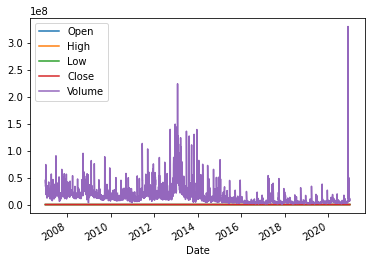

In [25]:
# all numeric columns are plotted
  # Volume column is so much bigger; overwhelms other columns
  # scale is so different
bb.plot()

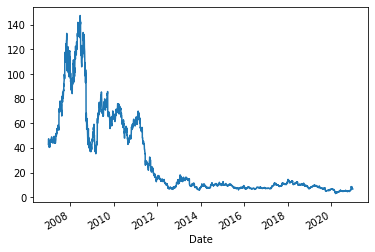

In [26]:
# if we just want to plot one column
bb['Close'].plot()

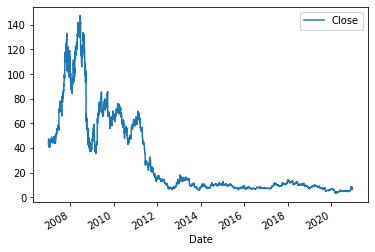

In [30]:
# alternatively:
bb.plot(y = 'Close')

# we get legend, which we don't get above

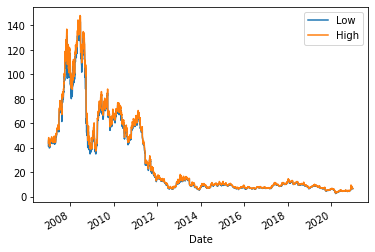

In [31]:
# plot High and Low
bb.plot(y = ['Low', 'High'])

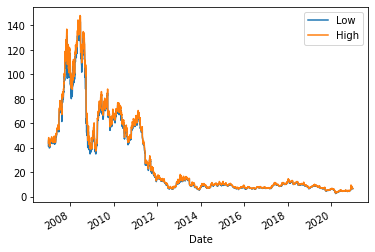

In [32]:
# alternatively:
bb[['Low', 'High']].plot()

## modifying aesthetics
- akin to theme_x in ggplot2

In [33]:
# available styles, akin to ggplot2 themes
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

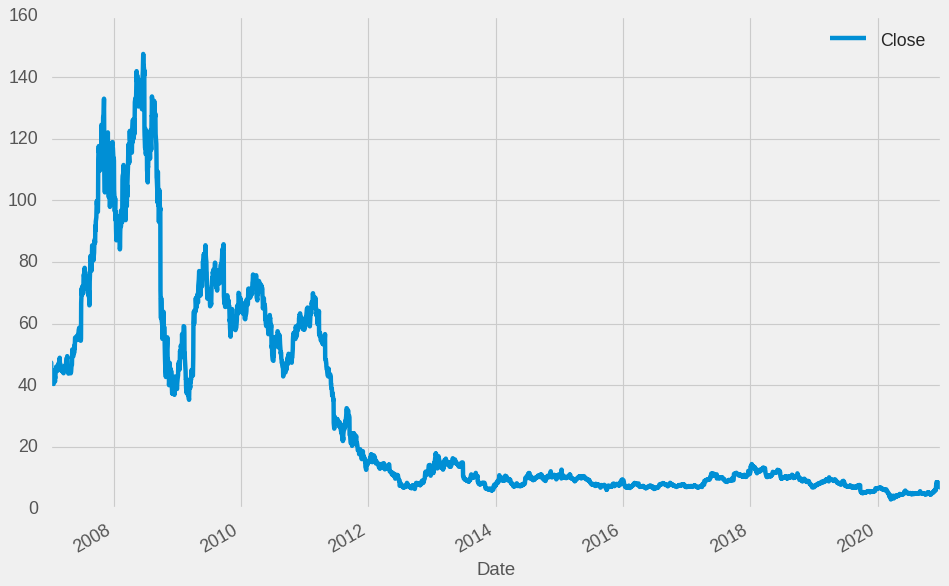

In [46]:
plt.style.use('fivethirtyeight')
bb.plot(y = 'Close')

## bar graphs to show counts

In [47]:
bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,43.13,44.03,41.70,42.85,34736896.0
2007-01-04,42.97,46.31,42.42,46.19,45990360.0
2007-01-05,45.50,47.31,45.17,47.10,41450552.0
2007-01-08,47.30,48.41,46.61,47.39,38546288.0
2007-01-09,47.59,47.67,43.26,43.67,74132240.0


In [ ]:
# bucket 'Close' into '< 10', '10 - 50', or '50+'
def bucket_close(closing_stock_price):
  if closing_stock_price > 50:
    return '> 50'
  elif closing_stock_price >= 10:
    return '10 - 50'
  else:
    return '< 10'


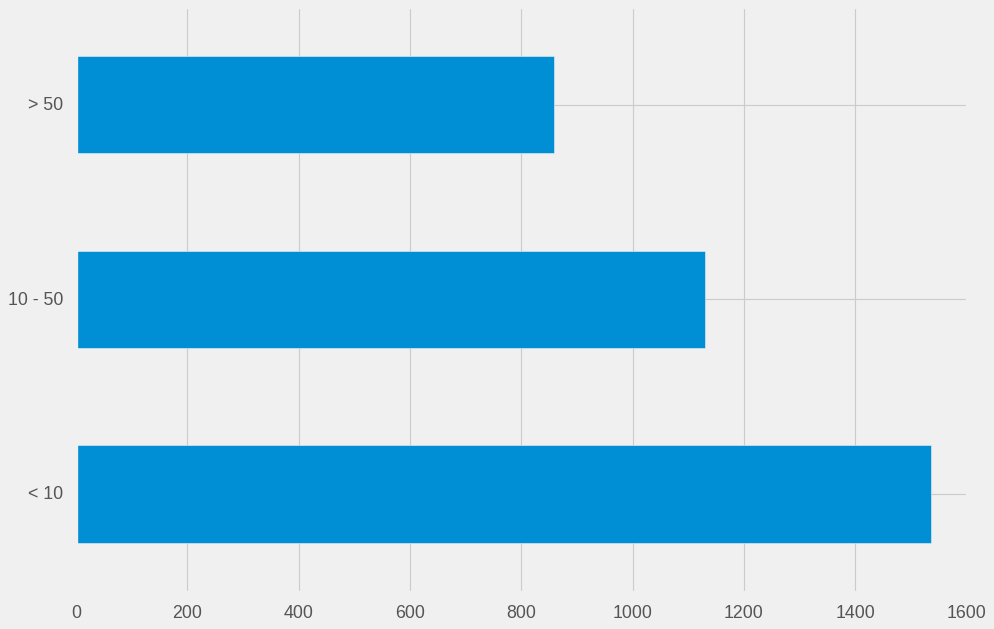

In [56]:
(
    bb['Close']
      .apply(bucket_close)     # categorize each value in Series
      .value_counts()          # count how many values in each bucket
      .plot(kind = 'barh')     # visualize
)

## pie charts

In [57]:
bb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,43.13,44.03,41.70,42.85,34736896.0
2007-01-04,42.97,46.31,42.42,46.19,45990360.0
2007-01-05,45.50,47.31,45.17,47.10,41450552.0
2007-01-08,47.30,48.41,46.61,47.39,38546288.0
2007-01-09,47.59,47.67,43.26,43.67,74132240.0


In [59]:
# on what proportion of days was Close below vs. above average?

# function to bucket closing stock price
def vs_avg(closing_stock_price):
  if closing_stock_price >= bb['Close'].mean():
    return '>= avg'
  else:
    return '< avg'


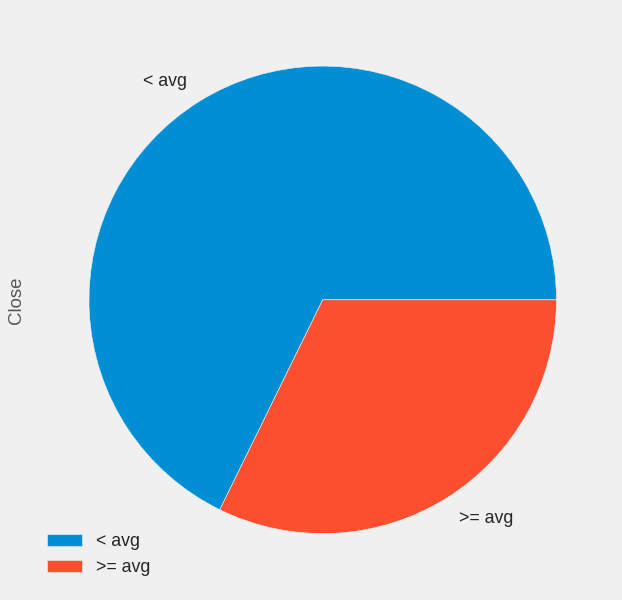

In [67]:
(
    bb['Close']
      .apply(vs_avg)
      .value_counts(normalize = True)
      .plot(kind = 'pie', legend = True)
)

In [68]:
# end of section